In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

sns.set(style="white", font_scale=1.2)

dfTrain = pd.read_csv('train.csv')
dfTest = pd.read_csv('test.csv')
dfGenderSubmission = pd.read_csv('gender_submission.csv')

# Data Preprocesssing

In [0]:
print("Trainset: ")
display(dfTrain)
print('\n\nTestset :')
display(dfTest)

Trainset: 


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C




Testset :


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


We can see that the difference in test set(11 col) and the train set(12 col)


*   Train set has column 'Survived'
*   Test set doesn't has 



**Check missing values**

In [0]:
dfTrain.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [0]:
dfTest.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

**Drop the unwanted columns**

In [0]:
dfTrain = dfTrain.drop(['PassengerId', 'Ticket', 'Cabin'], axis=1)
dfTest = dfTest.drop(['PassengerId', 'Ticket', 'Cabin'], axis=1)

**Fill the missing value**

In [0]:
dfTrain['Age'].fillna((dfTrain['Age'].mean()), inplace=True)
dfTest['Age'].fillna((dfTest['Age'].mean()), inplace=True)

print("\nTrain Set:")
display(dfTrain)
print("\n\nTest Set:")
display(dfTest)


Train Set:


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,30.0000,C




Test Set:


,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,"Kelly, Mr. James",male,34.50000,0,0,7.8292,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,7.0000,S
2,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,9.6875,Q
3,3,"Wirz, Mr. Albert",male,27.00000,0,0,8.6625,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",male,30.27259,0,0,8.0500,S
414,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,108.9000,C
415,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,7.2500,S
416,3,"Ware, Mr. Frederick",male,30.27259,0,0,8.0500,S


# Data Visualization

In [0]:
dfTrain.groupby('Sex', as_index=False)['Survived'].mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [0]:
dfTrain.groupby('Embarked', as_index=False)['Survived'].mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [0]:
dfTrain.groupby('Pclass', as_index=False)['Survived'].mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


# Data Cleaning

Address in name of people

In [0]:
for x in dfTrain:
  dfTrain['Address'] = dfTrain.Name.str.extract('([A-Za-z]+)\.')

for x in dfTest:
  dfTest['Address'] = dfTest.Name.str.extract('([A-Za-z]+)\.')

dfTrain.drop(['Name'], axis = 1, inplace = True)
dfTest.drop(['Name'], axis = 1, inplace = True)

In [0]:
print("\nTrain Set:")
display(dfTrain)
print("\n\nTest Set:")
display(dfTest)


Train Set:


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Address
0,0,3,male,22.000000,1,0,7.2500,S,Mr
1,1,1,female,38.000000,1,0,71.2833,C,Mrs
2,1,3,female,26.000000,0,0,7.9250,S,Miss
3,1,1,female,35.000000,1,0,53.1000,S,Mrs
4,0,3,male,35.000000,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Rev
887,1,1,female,19.000000,0,0,30.0000,S,Miss
888,0,3,female,29.699118,1,2,23.4500,S,Miss
889,1,1,male,26.000000,0,0,30.0000,C,Mr




Test Set:


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Address
0,3,male,34.50000,0,0,7.8292,Q,Mr
1,3,female,47.00000,1,0,7.0000,S,Mrs
2,2,male,62.00000,0,0,9.6875,Q,Mr
3,3,male,27.00000,0,0,8.6625,S,Mr
4,3,female,22.00000,1,1,12.2875,S,Mrs
...,...,...,...,...,...,...,...,...
413,3,male,30.27259,0,0,8.0500,S,Mr
414,1,female,39.00000,0,0,108.9000,C,Dona
415,3,male,38.50000,0,0,7.2500,S,Mr
416,3,male,30.27259,0,0,8.0500,S,Mr


In [0]:
dfTrain['Address'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Capt          1
Don           1
Countess      1
Ms            1
Lady          1
Sir           1
Jonkheer      1
Mme           1
Name: Address, dtype: int64

In [0]:
merge = [dfTrain, dfTest]

for dataset in merge:
    dataset['Address'] = dataset['Address'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Address'] = dataset['Address'].replace('Mlle', 'Miss')
    dataset['Address'] = dataset['Address'].replace('Ms', 'Miss')
    dataset['Address'] = dataset['Address'].replace('Mme', 'Mrs')

In [0]:
addressDict = {"Mr": 1, 
               "Miss": 2, 
               "Mrs": 3, 
               "Master": 4, 
               "Rare": 5}

In [0]:
for x in merge:
    x['Address'] = x['Address'].map(addressDict)
    x['Address'] = x['Address'].fillna(0)

In [0]:
print("\nTrain Set:")
display(dfTrain)
print("\n\nTest Set:")
display(dfTest)


Train Set:


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Address
0,0,3,male,22.000000,1,0,7.2500,S,1
1,1,1,female,38.000000,1,0,71.2833,C,3
2,1,3,female,26.000000,0,0,7.9250,S,2
3,1,1,female,35.000000,1,0,53.1000,S,3
4,0,3,male,35.000000,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,5
887,1,1,female,19.000000,0,0,30.0000,S,2
888,0,3,female,29.699118,1,2,23.4500,S,2
889,1,1,male,26.000000,0,0,30.0000,C,1




Test Set:


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Address
0,3,male,34.50000,0,0,7.8292,Q,1
1,3,female,47.00000,1,0,7.0000,S,3
2,2,male,62.00000,0,0,9.6875,Q,1
3,3,male,27.00000,0,0,8.6625,S,1
4,3,female,22.00000,1,1,12.2875,S,3
...,...,...,...,...,...,...,...,...
413,3,male,30.27259,0,0,8.0500,S,1
414,1,female,39.00000,0,0,108.9000,C,5
415,3,male,38.50000,0,0,7.2500,S,1
416,3,male,30.27259,0,0,8.0500,S,1


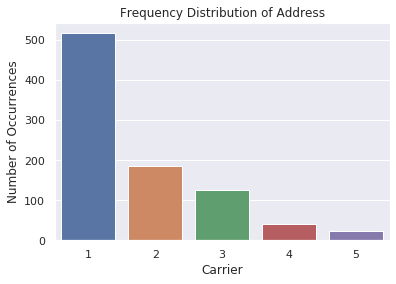

In [0]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
carrier_count = dfTrain['Address'].value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values)
plt.title('Frequency Distribution of Address')
plt.ylabel('Number of Occurrences')
plt.xlabel('Carrier')
plt.show()

**Age**

In [0]:
for dataset in merge:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']

In [0]:
dfTrain.Age = dfTrain.Age.astype(int)
dfTest.Age = dfTest.Age.astype(int)

print("\nTrain Set:")
display(dfTrain)
print("\n\nTest Set:")
display(dfTest)


Train Set:


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Address
0,0,3,male,1,1,0,7.2500,S,1
1,1,1,female,2,1,0,71.2833,C,3
2,1,3,female,1,0,0,7.9250,S,2
3,1,1,female,2,1,0,53.1000,S,3
4,0,3,male,2,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...,...
886,0,2,male,1,0,0,13.0000,S,5
887,1,1,female,1,0,0,30.0000,S,2
888,0,3,female,1,1,2,23.4500,S,2
889,1,1,male,1,0,0,30.0000,C,1




Test Set:


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Address
0,3,male,2,0,0,7.8292,Q,1
1,3,female,2,1,0,7.0000,S,3
2,2,male,3,0,0,9.6875,Q,1
3,3,male,1,0,0,8.6625,S,1
4,3,female,1,1,1,12.2875,S,3
...,...,...,...,...,...,...,...,...
413,3,male,1,0,0,8.0500,S,1
414,1,female,2,0,0,108.9000,C,5
415,3,male,2,0,0,7.2500,S,1
416,3,male,1,0,0,8.0500,S,1


In [0]:
for dataset in merge:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

dfTrain[['FamilySize', 'Survived']].groupby(['FamilySize'], 
                                             as_index=False).mean().sort_values(by='Survived', 
                                                                                ascending=False)
                                             
for dataset in merge:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

dfTrain[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False)

dfTest = dfTest.drop(['Parch', 'SibSp', 'FamilySize'], axis = 1)
dfTrain = dfTrain.drop(['FamilySize','SibSp', 'Parch'], axis = 1)

In [0]:
print("\nTrain Set:")
display(dfTrain)
print("\n\nTest Set:")
display(dfTest)


Train Set:


,Survived,Pclass,Sex,Age,Fare,Embarked,Address,IsAlone
0,0,3,male,1,7.2500,S,1,0
1,1,1,female,2,71.2833,C,3,0
2,1,3,female,1,7.9250,S,2,1
3,1,1,female,2,53.1000,S,3,0
4,0,3,male,2,8.0500,S,1,1
...,...,...,...,...,...,...,...,...
886,0,2,male,1,13.0000,S,5,1
887,1,1,female,1,30.0000,S,2,1
888,0,3,female,1,23.4500,S,2,0
889,1,1,male,1,30.0000,C,1,1




Test Set:


,Pclass,Sex,Age,Fare,Embarked,Address,IsAlone
0,3,male,2,7.8292,Q,1,1
1,3,female,2,7.0000,S,3,0
2,2,male,3,9.6875,Q,1,1
3,3,male,1,8.6625,S,1,1
4,3,female,1,12.2875,S,3,0
...,...,...,...,...,...,...,...
413,3,male,1,8.0500,S,1,1
414,1,female,2,108.9000,C,5,1
415,3,male,2,7.2500,S,1,1
416,3,male,1,8.0500,S,1,1


In [0]:
dfTest.isna().sum()

Pclass      0
Sex         0
Age         0
Fare        1
Embarked    0
Address     0
IsAlone     0
dtype: int64

In [0]:
dfTest['Fare'].fillna(dfTest['Fare'].dropna().median(), inplace=True)

In [0]:
dfTrain.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    2
Address     0
IsAlone     0
dtype: int64

In [0]:
dfTrain['Embarked'] = dfTrain['Embarked'].fillna(dfTrain.Embarked.dropna().mode()[0])

In [0]:
dfTrain.isna().sum()

Survived      0
Pclass        0
Age           0
Fare          0
Address       0
IsAlone       0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [0]:
dfTrain = pd.get_dummies(dfTrain)
dfTest = pd.get_dummies(dfTest)

print("\nTrain Set:")
display(dfTrain)
print("\n\nTest Set:")
display(dfTest)


Train Set:


,Survived,Pclass,Age,Fare,Address,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,7.2500,1,0,0,1,0,0,1
1,1,1,2,71.2833,3,0,1,0,1,0,0
2,1,3,1,7.9250,2,1,1,0,0,0,1
3,1,1,2,53.1000,3,0,1,0,0,0,1
4,0,3,2,8.0500,1,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,13.0000,5,1,0,1,0,0,1
887,1,1,1,30.0000,2,1,1,0,0,0,1
888,0,3,1,23.4500,2,0,1,0,0,0,1
889,1,1,1,30.0000,1,1,0,1,1,0,0




Test Set:


,Pclass,Age,Fare,Address,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,2,7.8292,1,1,0,1,0,1,0
1,3,2,7.0000,3,0,1,0,0,0,1
2,2,3,9.6875,1,1,0,1,0,1,0
3,3,1,8.6625,1,1,0,1,0,0,1
4,3,1,12.2875,3,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
413,3,1,8.0500,1,1,0,1,0,0,1
414,1,2,108.9000,5,1,1,0,1,0,0
415,3,2,7.2500,1,1,0,1,0,0,1
416,3,1,8.0500,1,1,0,1,0,0,1


# Training dataset 

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import average_precision_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.svm import SVC

**Check the balance of the features in test set and train set**

In [0]:
X_train = dfTrain.drop("Survived", axis=1)
Y_train = dfTrain["Survived"]
X_test  = dfTest.dropna().copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 10), (891,), (418, 10))

**Train the dataset using train.csv and test.csv**

In [0]:
#LogisticRegression
lr_c=LogisticRegression(random_state=0)
lr_c.fit(X_train,Y_train)
lr_pred=lr_c.predict(X_test)
acc_log = round(lr_c.score(X_train, Y_train) * 100, 2)

In [0]:
#SVM classifier
svc_c=SVC(kernel='linear',random_state=0)
svc_c.fit(X_train,Y_train)
svc_pred=svc_c.predict(X_test)
acc_svm = round(svc_c.score(X_train, Y_train) * 100, 2)

In [0]:
# DecisionTree Classifier
dtree_c=DecisionTreeClassifier(criterion='entropy',random_state=0)
dtree_c.fit(X_train,Y_train)
dtree_pred=dtree_c.predict(X_test)
acc_dtree = round(dtree_c.score(X_train, Y_train) * 100, 2)

In [0]:
#KNN
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,Y_train)
knn_pred=knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

In [0]:
Data = {'Model':['Logistic Regression','Linear SVM', 'Decision Tree Classifier', ' K-Nearest Neighbors'],
        'Accuracy':[acc_log, acc_svm, acc_dtree, acc_knn]}

df_machine = pd.DataFrame(Data, columns = ['Model', 'Accuracy'])
df_machine.transpose()

,0,1,2,3
Model,Logistic Regression,Linear SVM,Decision Tree Classifier,K-Nearest Neighbors
Accuracy,78.11,78.68,93.94,86.42


Text(0.5, 1.0, 'Model Accracy')

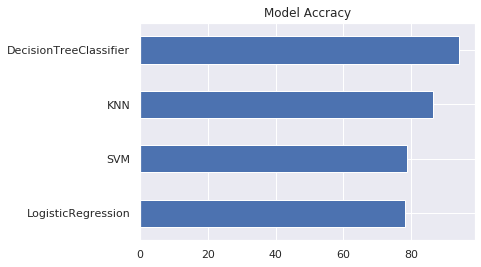

In [0]:
model_accuracy = pd.Series(data=[acc_log,
                                 acc_svm,
                                 acc_dtree,
                                 acc_knn], 
                index=['LogisticRegression',
                       'SVM',
                       'DecisionTreeClassifier',
                       'KNN'])
fig= plt.figure()
#sns.set(style="darkgrid")
#sns.barplot(x="day", y="tip", data=tips, capsize=.2)
#sns.barplot(data.index, index.values)
model_accuracy.sort_values().plot.barh()
plt.title('Model Accracy')